# Topic Doc Data Exploration

## Imports and Settings

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import re
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("max_colwidth", 400)

In [45]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

## Load Data and Explore

In [51]:
data_full = pd.read_csv('D:\\NLP\\Frame_NLP\\archive\\coronavirus_title.csv')
data_full.head()

,Processed_Title
0,The Coronavirus Is Airborne. The Coronavirus Is Airborne. The Coronavirus Is Airborne.
1,China Coronavirus Outbreak: How Is Coronavirus Treated ?
2,Coronavirus In Pennsylvania: Fayette County Reports First Case Of Coronavirus
3,Coronavirus Outbreak: Busted! Top Myths About Coronavirus
4,Coronavirus cases in UK confirmed: What are the symptoms of coronavirus ?


In [52]:
len(data_full)

8376

In [59]:
data_sample = data_full.sample(n = 8376, random_state=123)

In [61]:
data_sample.Processed_Title.value_counts()

US coronavirus death toll rises to 14, most cases in Washington             1
Men working as security guards are 'most likely to die from coronavirus'    1
These 5G coronavirus conspiracies are getting out of hand                   1
Coronavirus Australia latest: the week at a glance                          1
Coronavirus currently poses little concern for Fraser Valley, B.C.          1
                                                                           ..
PM commits to future coronavirus inquiry                                    1
The Hill's Campaign Report: Campaigns confront reality of coronavirus       1
Death Toll Rises To 253 After 11, 940 Cases Of Coronavirus In Pakistan      1
Canada's Chinese community faces racist abuse in wake of coronavirus        1
Coronavirus update: 36 new confirmed cases in New Zealand                   1
Name: Processed_Title, Length: 8376, dtype: int64

### Clean Data

In [62]:
stop_words = set(stopwords.words('english'))

print(stop_words)

{'by', 's', 'once', 'had', 'do', "couldn't", 'of', 'here', 'couldn', "you'd", 'those', 'then', "should've", 'hadn', 'y', 'out', 'all', 'doesn', 're', 'myself', 'aren', 'very', 'above', 'if', "shan't", 'mightn', 'an', "hadn't", 'and', 'with', "it's", 'up', 'ourselves', "needn't", 'now', 'below', 'under', "won't", 'no', 'shan', "aren't", 'your', 'until', 'don', 'wasn', 'did', 'have', 'which', 'between', 'each', 'me', 'shouldn', 'ma', "weren't", 'or', 'same', 'ain', 'again', 'yours', "don't", 'few', "you're", 'during', 'needn', 'itself', 'they', 'what', 'such', "you've", 'further', 'm', "wouldn't", 'd', 'should', 'when', 'yourselves', 'it', 'he', 'through', 'from', "shouldn't", 'just', 'both', 'ours', 'to', 'themselves', 'other', 'theirs', 'over', 'nor', 'will', 'o', 'a', 'before', 'how', 'his', 't', 'these', 'himself', 'them', 'i', 'haven', 'into', 'hasn', "she's", 'can', 'were', 'who', 'against', 'in', 'herself', 'as', 'too', 'we', 'for', 'there', 'some', 'its', 'are', 'has', 'won', 'be

In [63]:
def clean_text(text):
    """
    Summary: turns text input string into list of cleaned word tokens
    
    Arguments:
        text: str of text
    
    Returns:
        lemmatized_words: str, lemmatized words from original text after cleaning
    """
    
    # remove numbers
    clean_text = re.sub(r'[0-9]+', '', text)
    
    # remove punctuation
    clean_text = re.sub(r'[^\w\s]', '', clean_text)
    
    # remove 'coronavirus'
    clean_text = re.sub()
    
    # convert everything to lowercase
    clean_text = clean_text.lower()
    
    # tokenize
    wt = WhitespaceTokenizer()
    words = wt.tokenize(clean_text)
    
    # remove stop words
    cleaned_words = []
    for w in words:
        if w not in stop_words:
            cleaned_words.append(w)
            
    # lemmatize words
    wnl = WordNetLemmatizer()
    wnl_lemmatized_tokens = []
    for token in cleaned_words:
        wnl_lemmatized_tokens.append(wnl.lemmatize(token))
    
    lemmatized_words = ' '.join(wnl_lemmatized_tokens)
    
    return lemmatized_words

In [64]:
data_sample['cleaned_text'] = data_sample['Processed_Title'].apply(lambda x: clean_text(x))
data_sample.head()

,Processed_Title,cleaned_text
6372,"US coronavirus death toll rises to 14, most cases in Washington",u coronavirus death toll rise case washington
4678,"Iran rejects U.S. offer for coronavirus aid, cites conspiracy theory",iran reject u offer coronavirus aid cite conspiracy theory
4659,TSA is making 3 changes to stop coronavirus from spreading on planes,tsa making change stop coronavirus spreading plane
4611,NBA Players to Take Pay Cut Amidst Coronavirus Crisis,nba player take pay cut amidst coronavirus crisis
8314,"Coronavirus Cases confirmed in North Korea, say officials",coronavirus case confirmed north korea say official


In [65]:
sample_text = ' '.join(list(data_sample['Processed_Title'].values))
print(sample_text[0:1000])

US coronavirus death toll rises to 14, most cases in Washington Iran rejects U.S. offer for coronavirus aid, cites conspiracy theory TSA is making 3 changes to stop coronavirus from spreading on planes NBA Players to Take Pay Cut Amidst Coronavirus Crisis Coronavirus Cases confirmed in North Korea, say officials Mayor Greg Fischer more coronavirus cases than thought Number Of Confirmed Coronavirus Cases In Southern Germany Rises To 4 Health Ministry Coronavirus live updates: US President Donald Trump declares coronavirus pandemic a national emergency South Africa Starts Easing Coronavirus Lockdown Coronavirus: Ekiti state government declares 14 day curfew Will Coronavirus Propel This Vaccine Maker's Stock Even Higher ?  House passes bill to help prop up economy from coronavirus Schools, colleges in HP to not hold mass gatherings amid coronavirus scare Zimbabwe extends coronavirus lockdown again Battling Coronavirus: 5 Unicef guidelines for parents, caregivers and community members Coro

In [66]:
clean_sample_text = ' '.join(list(data_sample['cleaned_text'].values))
print(clean_sample_text[0:1000])

u coronavirus death toll rise case washington iran reject u offer coronavirus aid cite conspiracy theory tsa making change stop coronavirus spreading plane nba player take pay cut amidst coronavirus crisis coronavirus case confirmed north korea say official mayor greg fischer coronavirus case thought number confirmed coronavirus case southern germany rise health ministry coronavirus live update u president donald trump declares coronavirus pandemic national emergency south africa start easing coronavirus lockdown coronavirus ekiti state government declares day curfew coronavirus propel vaccine maker stock even higher house pass bill help prop economy coronavirus school college hp hold mass gathering amid coronavirus scare zimbabwe extends coronavirus lockdown battling coronavirus unicef guideline parent caregiver community member coronavirus passenger asia screened prof abayomi sweden evacuate citizen coronavirus hit hubei province foreign minister trump many hunch coronavirus here exp

### Word distributions across all messages in sample

In [67]:
# tokenize
wt = WhitespaceTokenizer()
clean_tokens = wt.tokenize(clean_sample_text)

freq_dist = FreqDist(clean_tokens)
print(freq_dist)

<FreqDist with 7503 samples and 55117 outcomes>


In [68]:
freq_dist.most_common(500)

[('coronavirus', 8525),
 ('case', 1047),
 ('new', 491),
 ('death', 487),
 ('test', 485),
 ('u', 440),
 ('outbreak', 392),
 ('positive', 377),
 ('china', 365),
 ('report', 351),
 ('trump', 330),
 ('first', 328),
 ('say', 284),
 ('health', 267),
 ('amid', 265),
 ('spread', 254),
 ('lockdown', 224),
 ('patient', 223),
 ('update', 216),
 ('pandemic', 216),
 ('due', 207),
 ('rise', 190),
 ('uk', 183),
 ('india', 180),
 ('hospital', 178),
 ('confirmed', 171),
 ('covid', 159),
 ('toll', 152),
 ('people', 149),
 ('fear', 147),
 ('may', 145),
 ('testing', 143),
 ('official', 142),
 ('state', 141),
 ('vaccine', 138),
 ('dy', 137),
 ('confirms', 136),
 ('latest', 136),
 ('fight', 134),
 ('emergency', 133),
 ('home', 128),
 ('news', 127),
 ('two', 120),
 ('world', 116),
 ('hit', 115),
 ('tested', 110),
 ('live', 109),
 ('wuhan', 108),
 ('response', 106),
 ('symptom', 106),
 ('could', 105),
 ('infection', 105),
 ('doctor', 101),
 ('chinese', 99),
 ('minister', 97),
 ('crisis', 94),
 ('flight', 94),

In [70]:
freq_dist.get('china')

365

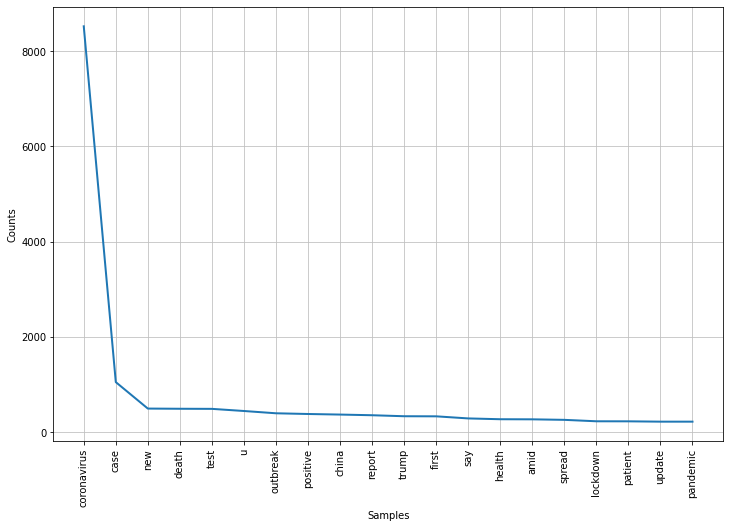

In [71]:
fig, ax = plt.subplots(figsize=(12,8))
freq_dist.plot(20, cumulative=False)
plt.show()

In [72]:
data_sample.to_csv('D:\\NLP\\Frame_NLP\\archive\\Sent_Cluster\\data_sample.csv')

## Topic Modeling

### Imports

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

import gensim
from gensim.corpora.dictionary import Dictionary
from gensim.models.phrases import Phrases, Phraser
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models
from corextopic import corextopic as ct

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("max_colwidth", 400)

### Load Data

In [76]:
data_sample = pd.read_csv('D:\\NLP\\Frame_NLP\\archive\\Sent_Cluster\\data_sample.csv')
data_sample.head()

,Unnamed: 0,Processed_Title,cleaned_text
0,6372,"US coronavirus death toll rises to 14, most cases in Washington",u coronavirus death toll rise case washington
1,4678,"Iran rejects U.S. offer for coronavirus aid, cites conspiracy theory",iran reject u offer coronavirus aid cite conspiracy theory
2,4659,TSA is making 3 changes to stop coronavirus from spreading on planes,tsa making change stop coronavirus spreading plane
3,4611,NBA Players to Take Pay Cut Amidst Coronavirus Crisis,nba player take pay cut amidst coronavirus crisis
4,8314,"Coronavirus Cases confirmed in North Korea, say officials",coronavirus case confirmed north korea say official


In [77]:
X = data_sample['cleaned_text']
X.head()

0                 u coronavirus death toll rise case washington
1    iran reject u offer coronavirus aid cite conspiracy theory
2            tsa making change stop coronavirus spreading plane
3             nba player take pay cut amidst coronavirus crisis
4           coronavirus case confirmed north korea say official
Name: cleaned_text, dtype: object

In [78]:
len(X)

8376

### LDA with Gensim

In [85]:
all_messages = data_sample['cleaned_text'].values.tolist()
all_tokens = [sent.split(' ') for sent in all_messages]

In [86]:
# Add bigrams and trigrams to docs (only ones that appear 10 times or more).
bigram_phrases = Phrases(all_tokens, min_count=5)
bigram = Phraser(bigram_phrases)

for idx in range(len(all_tokens)):
    for token in bigram[all_tokens[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            all_tokens[idx].append(token)

In [87]:
bigram.phrasegrams

{'death_toll': 55.97752080406355,
 'toll_rise': 39.92465373961219,
 'conspiracy_theory': 900.8000000000001,
 'number_confirmed': 12.848381115390103,
 'health_ministry': 71.97403245942571,
 'live_update': 79.58137954468229,
 'donald_trump': 91.57693059628544,
 'trump_declares': 18.197979797979798,
 'national_emergency': 75.60482601853471,
 'south_africa': 183.52461799660443,
 'house_pass': 144.61003344481603,
 'mass_gathering': 284.46315789473687,
 'hubei_province': 180.61152882205513,
 'expert_say': 12.687323943661973,
 'sxsw_canceled': 264.94117647058823,
 'report_first': 13.770828990341187,
 'need_know': 199.98455598455598,
 'father_dy': 17.5338199513382,
 'patient_recover': 50.493273542600896,
 'report_new': 12.126284517323214,
 'harvey_weinstein': 1457.1764705882354,
 'test_positive': 48.477519210260056,
 'panic_buying': 86.20095693779903,
 'health_minister': 25.04251129387235,
 'knicks_owner': 755.916083916084,
 'owner_james': 363.959595959596,
 'james_dolan': 1455.838383838384,
 

In [88]:
dictionary = Dictionary(all_tokens)

# filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=10, no_above=0.9)

# bag-of-words representation of the documents
corpus = [dictionary.doc2bow(text) for text in all_tokens]

In [89]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 969
Number of documents: 8376


In [90]:
def compute_coherence_values(corpus, dictionary, num_topics):
    """
    Returns coherence of LDA model based for a given number of topics
    
    Arguments:
        corpus: list, of bag-of-words representation of each document
        dictionary: gensim dictionary oboject of document tokens
        num_topics: int, number of topics to model
    Returns:
        coherence: Cv coherence measure of topic model
    """
    
    # Set training parameters
    chunksize = 2000
    passes = 20
    iterations = 400
    eval_every = None  
    
    # Make a index to word dictionary.
    temp = dictionary[0]  # This is only to "load" the dictionary.
    id2word = dictionary.id2token
    
    lda_model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       chunksize=chunksize,
                                       alpha='auto',
                                       eta='auto',
                                       iterations=iterations,
                                       num_topics=num_topics,
                                       passes=passes,
                                       eval_every=eval_every
                                      )
    
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=all_tokens, 
                                         dictionary=dictionary, 
                                         coherence='c_v')
    
    coherence = coherence_model_lda.get_coherence()
    #perplexity = lda_model.log_perplexity(corpus)  
    
    return coherence

In [93]:
%%time

coherence_scores = []
#perplexity_scores = []
for NUM_TOPICS in range(2,30):
    coherence = compute_coherence_values(corpus, dictionary, NUM_TOPICS)
    coherence_scores.append(coherence)
    #perplexity_scores.append(perplexity)

Wall time: 6min 3s


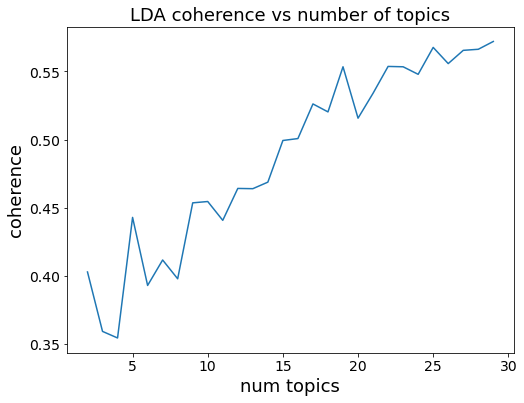

In [95]:
x = range(2, 30)
y = coherence_scores

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y)

plt.xlabel('num topics', fontsize=18)
plt.ylabel('coherence', fontsize=18)
plt.title('LDA coherence vs number of topics', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [96]:
plt.savefig('C:\\Users\\hp\\Desktop\\Thesis1.0\\NLP_Result\\Coronavirus_Title_TopicNUM.png')

<Figure size 432x288 with 0 Axes>

In [110]:
list(range(2,30))[np.argmax(coherence_scores)]

29

In [112]:
for m, cv in zip(x, coherence_scores):
    print("NUm Topics =", m, " has Coherence Value of", round(cv, 4))

NUm Topics = 2  has Coherence Value of 0.4029
NUm Topics = 3  has Coherence Value of 0.3592
NUm Topics = 4  has Coherence Value of 0.3544
NUm Topics = 5  has Coherence Value of 0.4429
NUm Topics = 6  has Coherence Value of 0.393
NUm Topics = 7  has Coherence Value of 0.4117
NUm Topics = 8  has Coherence Value of 0.3979
NUm Topics = 9  has Coherence Value of 0.4536
NUm Topics = 10  has Coherence Value of 0.4546
NUm Topics = 11  has Coherence Value of 0.4408
NUm Topics = 12  has Coherence Value of 0.4642
NUm Topics = 13  has Coherence Value of 0.464
NUm Topics = 14  has Coherence Value of 0.4688
NUm Topics = 15  has Coherence Value of 0.4994
NUm Topics = 16  has Coherence Value of 0.5008
NUm Topics = 17  has Coherence Value of 0.5262
NUm Topics = 18  has Coherence Value of 0.5203
NUm Topics = 19  has Coherence Value of 0.5535
NUm Topics = 20  has Coherence Value of 0.5157
NUm Topics = 21  has Coherence Value of 0.534
NUm Topics = 22  has Coherence Value of 0.5537
NUm Topics = 23  has Coh

In [113]:
# Set training parameters
num_topics = 19
chunksize = 2000
passes = 20
iterations = 400
eval_every = 5  

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

In [114]:
top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -14.8582.
[([(0.15299499, 'new'),
   (0.11305041, 'positive'),
   (0.11249454, 'test'),
   (0.0794848, 'case'),
   (0.072411425, 'test_positive'),
   (0.0411887, 'covid'),
   (0.0302981, 'report'),
   (0.022476146, 'latest'),
   (0.0193784, 'death'),
   (0.019266794, 'total'),
   (0.01590574, 'report_new'),
   (0.013714994, 'look'),
   (0.013669978, 'york'),
   (0.013640582, 'update'),
   (0.013524083, 'see'),
   (0.013266996, 'colorado'),
   (0.013127405, 'new_york'),
   (0.012359242, 'recovery'),
   (0.011603129, 'daily'),
   (0.009658944, 'philippine')],
  -9.73850023859289),
 ([(0.1377876, 'case'),
   (0.110722, 'first'),
   (0.10381917, 'report'),
   (0.06445056, 'confirmed'),
   (0.054481257, 'official'),
   (0.051086176, 'death'),
   (0.049957067, 'two'),
   (0.032279223, 'health'),
   (0.025178697, 'country'),
   (0.024968147, 'county'),
   (0.02073569, 'week'),
   (0.017230975, 'authority'),
   (0.017150478, 'health_official'),
   (0.016978426, 'second

In [115]:
topics = model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.100*"spread" + 0.086*"fight" + 0.058*"may" + 0.054*"help" + 0.038*"expert"')
(1, '0.116*"trump" + 0.095*"say" + 0.051*"test" + 0.047*"impact" + 0.044*"world"')
(2, '0.157*"death" + 0.082*"toll" + 0.070*"death_toll" + 0.056*"get" + 0.044*"rise"')
(3, '0.208*"case" + 0.093*"india" + 0.073*"rise" + 0.060*"news" + 0.041*"case_rise"')
(4, '0.058*"pakistan" + 0.049*"victim" + 0.038*"go" + 0.034*"stay" + 0.033*"german"')
(5, '0.101*"lockdown" + 0.083*"amid" + 0.045*"state" + 0.039*"close" + 0.039*"government"')
(6, '0.125*"due" + 0.097*"testing" + 0.040*"australia" + 0.038*"concern" + 0.032*"cancelled"')
(7, '0.153*"new" + 0.113*"positive" + 0.112*"test" + 0.079*"case" + 0.072*"test_positive"')
(8, '0.082*"health" + 0.050*"number" + 0.043*"ministry" + 0.043*"symptom" + 0.043*"germany"')
(9, '0.070*"wuhan" + 0.038*"infected" + 0.029*"say" + 0.029*"person" + 0.028*"u"')
(10, '0.182*"outbreak" + 0.041*"people" + 0.040*"govt" + 0.034*"watch" + 0.031*"u"')
(11, '0.120*"update" + 0.061*"live

In [116]:
# compute coherence score
coherence_model_lda = CoherenceModel(model=model, 
                                     texts=all_tokens, 
                                     dictionary=dictionary, 
                                     coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

print('\nPerplexity: ', model.log_perplexity(corpus))


Coherence Score:  0.4949162965004658

Perplexity:  -6.613632921013587


In [117]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
LDAvis_prepared

C:\Users\hp\miniconda3\envs\SBERT_env\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
7      0.234545  0.132384       1        1  8.949726
17     0.317665  0.038826       2        1  6.687699
18    -0.081707 -0.168297       3        1  6.594746
5     -0.058770 -0.259519       4        1  6.336182
1     -0.095152  0.219200       5        1  5.965711
3      0.242807  0.030488       6        1  5.579960
10    -0.163502  0.083482       7        1  5.515382
2      0.106722 -0.063255       8        1  5.201847
9     -0.120013  0.082984       9        1  5.088433
15    -0.034111 -0.034771      10        1  5.045927
0     -0.122058  0.169968      11        1  4.991911
14    -0.032561 -0.125906      12        1  4.686696
11    -0.069325  0.064384      13        1  4.685615
6     -0.037478 -0.122622      14        1  4.678999
13     0.188134 -0.025835      15        1  4.398179
12    -0.102590 -0.031809      16        1  4.340423
8      0.011736 -0.104202      17        1  4.323366
16    -0.094793  0.032664      18        1  4.106582
4     -0.089550  0.081836      19        1  2.822617, topic_info=         Term         Freq        Total Category  logprob  loglift
0        case  1022.000000  1022.000000  Default  30.0000  30.0000
136       new   464.000000   464.000000  Default  29.0000  29.0000
169  outbreak   396.000000   396.000000  Default  28.0000  28.0000
119     china   364.000000   364.000000  Default  27.0000  27.0000
1       death   450.000000   450.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
698   billion    19.582785    33.696068  Topic19  -3.8867   3.0248
121       may    26.717370   153.503429  Topic19  -3.5760   1.8191
359      home    24.925908   148.885785  Topic19  -3.6454   1.7802
26        say    16.622372   294.444549  Topic19  -4.0506   0.6932
25   official    15.346375   164.124311  Topic19  -4.1304   1.1978

[760 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
883       9  0.961391          across
942      15  0.923650          action
615       1  0.971256      additional
865       9  0.974072  administration
786      10  0.956014        admitted
...     ...       ...             ...
802      11  0.966774             yet
272       1  0.969230            york
229      17  0.931009        youngest
837       1  0.952136         zealand
585      19  0.934774             zoo

[811 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 18, 19, 6, 2, 4, 11, 3, 10, 16, 1, 15, 12, 7, 14, 13, 9, 17, 5])

In [118]:
pyLDAvis.disable_notebook()